In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv("/content/Churn_Modelling.csv")

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [10]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [11]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [12]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [18]:
X = df.drop(columns=['Exited', 'Surname', 'RowNumber', 'CustomerId'])
y = df['Exited'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

ValueError: could not convert string to float: "P'an"

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [21]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [23]:
model = Sequential()
model.add(Dense(11, activation='sigmoid',input_dim=11))
model.add(Dense(11, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7943 - loss: 0.5526 - val_accuracy: 0.7987 - val_loss: 0.5070
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7970 - loss: 0.5072 - val_accuracy: 0.7987 - val_loss: 0.5012
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7925 - loss: 0.5091 - val_accuracy: 0.7987 - val_loss: 0.4982
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7936 - loss: 0.5048 - val_accuracy: 0.7987 - val_loss: 0.4965
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7947 - loss: 0.5007 - val_accuracy: 0.7987 - val_loss: 0.4951
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7935 - loss: 0.5036 - val_accuracy: 0.7987 - val_loss: 0.4944
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7947 - loss: 0.4997 - val_accuracy: 0.7987 - val_loss: 0.4941
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7920 - loss: 0.5059 - val_accu

In [27]:
 y_pred = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [28]:
y_pred

array([[0.24758375],
       [0.14742005],
       [0.14742005],
       ...,
       [0.14742005],
       [0.14742005],
       [0.24758375]], dtype=float32)

In [29]:
y_pred = y_pred.argmax(axis=-1)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8035

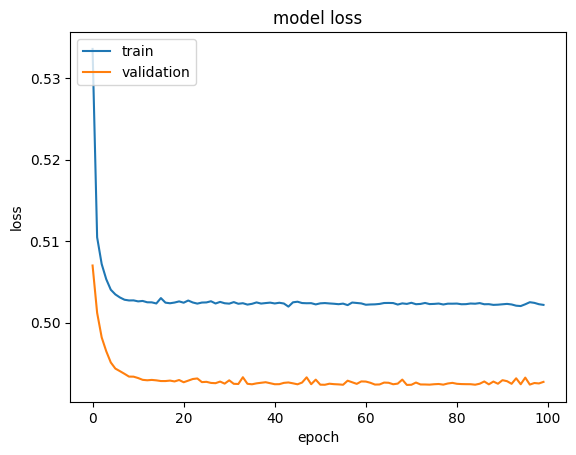

In [31]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

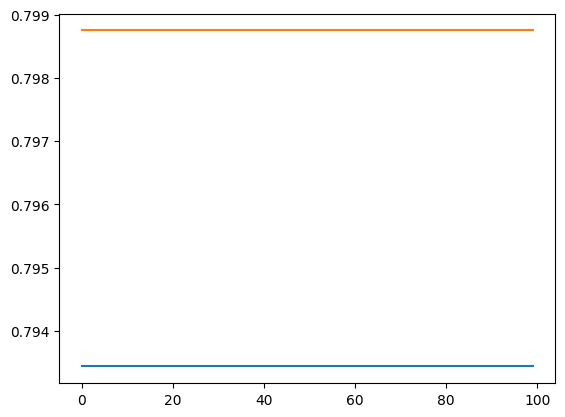

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])